In [1]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

print(tf.__version__)

2.8.0


In [2]:
df = pd.read_csv("data.csv", index_col = 0)
#df = df.head(1500)
df.loc[df.sel == 'aufgenommen', 'sel']  = 1

df.loc[df.sel == 'nicht aufgenommen', 'sel']  = 0
df = df.dropna()

In [3]:
df

,alter,Quote,Schultyp,fz_score,zf_score,gm_score,md_score,bi_score,ch_score,ph_score,ma_score,tv_score,sel,geschlecht
0,25.0,Österreich,Gymnasium,21.0,23.0,19.0,11.0,50.0,29.0,20.0,20.0,24.0,1,w
1,20.0,EU,Gymnasium,19.0,26.0,17.0,12.0,45.0,26.0,16.0,18.0,24.0,1,w
2,19.0,Österreich,Realgymnasium,18.0,25.0,19.0,12.0,41.0,27.0,18.0,19.0,22.0,1,w
3,20.0,Österreich,Realgymnasium,21.0,26.0,19.0,13.0,41.0,22.0,11.0,18.0,23.0,1,m
4,21.0,Österreich,H.techn.u.gewerbl. Lehranstalt,21.0,21.0,19.0,12.0,44.0,24.0,18.0,19.0,23.0,1,m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4159,28.0,nicht EU,Humanistisches Gymnasium,9.0,6.0,5.0,2.0,8.0,9.0,6.0,0.0,2.0,0,w
4160,35.0,Österreich,Naturwissensch. Realgymnasium,11.0,5.0,7.0,3.0,9.0,0.0,0.0,0.0,6.0,0,m
4161,28.0,nicht EU,Gymnasium,4.0,10.0,6.0,1.0,12.0,4.0,1.0,5.0,4.0,0,m
4163,19.0,Österreich,Oberstufenrealgymnasium,4.0,4.0,6.0,3.0,12.0,7.0,3.0,5.0,6.0,0,m


In [4]:
X = df.drop(['sel'], axis = 1) #independent variable
y = df['sel'] 
X = pd.get_dummies(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #train

# Neural Network

In [5]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [6]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim = X.shape[1])) #classifier
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu')) #hidden layer
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) #output layer
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [7]:
classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer="Adam",
                             batch_size=32,
                             epochs=50)

history = classifier.fit(X_train, y_train, validation_split=0.2, verbose=1)

Epoch 1/50


2022-05-26 14:20:30.944014: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


84/84 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.8278 - val_loss: 0.4579 - val_accuracy: 0.8511
Epoch 2/50
84/84 [==============================] - 0s 946us/step - loss: 0.4457 - accuracy: 0.8375 - val_loss: 0.3511 - val_accuracy: 0.8511
Epoch 3/50
84/84 [==============================] - 0s 928us/step - loss: 0.3327 - accuracy: 0.8375 - val_loss: 0.2661 - val_accuracy: 0.8511
Epoch 4/50
84/84 [==============================] - 0s 921us/step - loss: 0.2896 - accuracy: 0.8706 - val_loss: 0.2329 - val_accuracy: 0.9173
Epoch 5/50
84/84 [==============================] - 0s 895us/step - loss: 0.2603 - accuracy: 0.8928 - val_loss: 0.2255 - val_accuracy: 0.9248
Epoch 6/50
84/84 [==============================] - 0s 874us/step - loss: 0.2516 - accuracy: 0.8936 - val_loss: 0.2192 - val_accuracy: 0.9143
Epoch 7/50
84/84 [==============================] - 0s 935us/step - loss: 0.2456 - accuracy: 0.8913 - val_loss: 0.2104 - val_accuracy: 0.9248
Epoch 8/50
84/84 [=

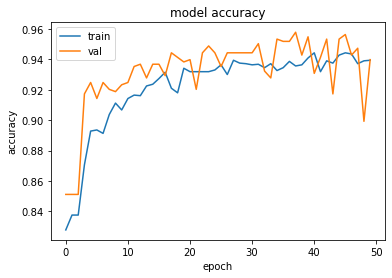

In [8]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
#plt.show()

In [9]:
np.mean(history.history['val_accuracy']).mean()

0.9321804475784302

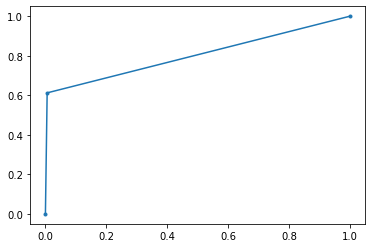

In [10]:
from sklearn.metrics import roc_curve, auc
y_test = np.array(y_test).astype(int)
y_pred = classifier.predict(X_test).ravel()
y_pred = y_pred.astype(int)
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.savefig('roc_nn.png')

# Multiple Layer Neural Network

In [11]:
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units=10,kernel_initializer='uniform',activation='relu',input_dim= X.shape[1])) #classifier
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=128,kernel_initializer='uniform',activation='relu')) #hidden layer
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=256,kernel_initializer='uniform',activation='relu')) #hidden layer
    classifier.add(Dropout(rate = 0.2)) #reduce overfitting
    classifier.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid')) #output layer
    classifier.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    return classifier

In [12]:
classifier = KerasClassifier(build_fn = build_classifier,
                             optimizer="Adam",
                             batch_size=32,
                             epochs=50)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1) #train

In [14]:
history = classifier.fit(X_train, y_train, validation_split=0.2, verbose=0)
preds = classifier.predict(X) #to choose the best classifier # training

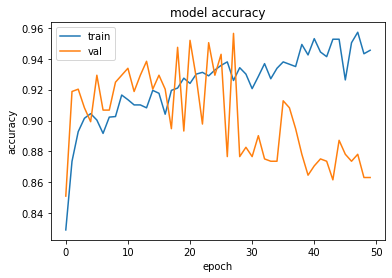

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
np.mean(history.history['val_accuracy']).mean()

0.9017142844200134

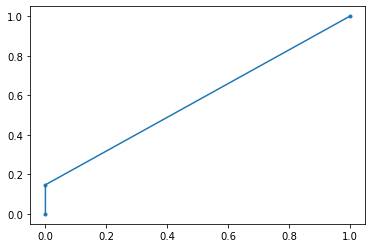

In [17]:
from sklearn.metrics import roc_curve, auc
y_test = np.array(y_test).astype(int)
y_pred = y_pred.astype(int)
y_pred = classifier.predict(X_test).ravel()
nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)
plt.savefig('roc_mnn.png')